* alibi-detect comes with several benchmark datasets for time-series anomaly
detection.
1. fetch_ecg—ECG dataset from the BIDMC Congestive Heart Failure Database.
2. fetch_nab—Numenta Anomaly Benchmark.
3. fetch_kdd—KDD Cup '99 dataset of computer network intrusions.

In [1]:
!pip install alibi_detect

     |████████████████████████████████| 280 kB 30.6 MB/s 
     |████████████████████████████████| 458.3 MB 10 kB/s 
     |████████████████████████████████| 3.1 MB 45.7 MB/s 
     |████████████████████████████████| 4.8 MB 62.9 MB/s 
     |████████████████████████████████| 5.6 MB 67.8 MB/s 
     |████████████████████████████████| 1.3 MB 56.8 MB/s 
     |████████████████████████████████| 462 kB 64.4 MB/s 
     |████████████████████████████████| 895 kB 46.9 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 3.3 MB 46.4 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=69cee2deeae4eea3fc21b7834b6f7e53c62d1d1a3f03c2f9f70d7bbc838fe073
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=0f1adf3709a65b06

* Load the time-series of computer network intrusions (KDD99).

In [2]:
from alibi_detect.datasets import fetch_kdd

intrusions = fetch_kdd()

In [3]:
intrusions["target"].sum() / len(intrusions["target"])

0.8030893423558918

* intrusions is a dictionary, where the data key returns a matrix of 494021x18.
* The 18 dimensions of the time-series are the continuous features of the dataset, mostly error rates and counts.

In [4]:
intrusions["feature_names"]

['srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

* Load and run the SpectralResidual model that implements the method
proposed by Microsoft.

In [5]:
from alibi_detect.od import SpectralResidual

od = SpectralResidual(
    threshold=1.0, window_amp=20, window_local=20, n_est_points=10, n_grad_points=5
)
intrusion_outliers = od.predict(intrusions["data"])

* Then get the anomaly scores for each point in time-series.

In [6]:
scores = od.score(intrusions["data"][:, 0])

* Plot time-series (we'll choose – arbitrarily – the first dimension
of dataset).

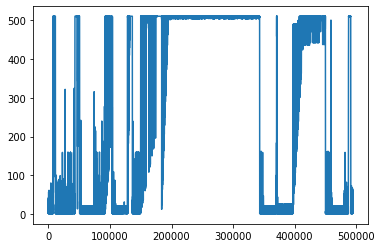

In [7]:
import pandas as pd

pd.Series(intrusions["data"][:, 0]).plot();

* Plot the scores imposed on top of time-series.
* Use a dual y-axis for plotting the scores and the data within the same plot.

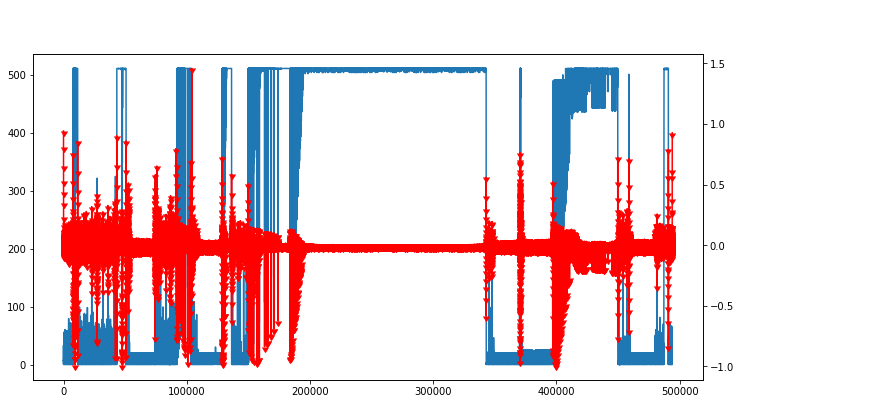

In [8]:
import matplotlib

ax = pd.Series(intrusions["data"][:, 0], name="data").plot(
    legend=False, figsize=(12, 6)
)
ax2 = ax.twinx()
ax = pd.Series(scores, name="scores").plot(
    ax=ax2, legend=False, color="r", marker=matplotlib.markers.CARETDOWNBASE
)
ax.figure.legend(bbox_to_anchor=(1, 1), loc="upper left");

* Some points are not recognized as outliers since the periodic nature of the signal is removed by the Fourier filter.